In [68]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 1000
plt.style.use(['science','ieee'])
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Constants
MHz = 1e6
GHz = 1e9

In [166]:
df = pd.read_excel('data.xlsx')
# df = df[df.index < 65]
df=df[df['SFDR'] != 'DNR']
df=df[df['SFDR'] != '-']
df=df[df['Fout test'] != 'DNR']

df_stanford = df[df['Author'] == 'Caragiulo']

In [167]:
df

,Ref,Author,Yr,M,Fs MS,Arch msb+lsb,Cal,Fout test,Supply,SFDR,IM3,ZL,FS Iout,Power (mW),Process,Area (mm2),Comment,Publication,INL,DNL
0,[08],Park,1999,10,70,"CS, 7+3",none,1,NaN,55,NaN,DNR,DNR,120,CMOS 800nm,6.2,NaN,Elec. Letters,0.79,0.69
1,[09],Park,2000,10,100,"CS, 8+2",none,10,NaN,52,NaN,75,27,110,CMOS 350nm,3.6,NaN,TEC,0.43,0.17
2,[11],Lin & Bult,1998,10,500,"CS, 8+2",none,240,NaN,52,NaN,75,27,125,CMOS 350nm,0.6,classic paper,JSSC,0.2,0.1
3,[18],Tesch,1997,14,100,"CS, 4+10",none,10,NaN,70,NaN,DNR,DNR,650,BiCMOS,16.73,NaN,JSSC,1,0.9
4,[19],Bugeja,1999,14,100,"CS, 4+5+5, RZ, TA",Ext SA,25.5,NaN,75,NaN,50,20,750,CMOS 800nm,14.4,mentions Cout nonlin,JSSC,0.5,0.5
5,[20],Van der Plas,1999,14,150,"CS, 8+6",none,5,NaN,61,NaN,50,DNR,300,CMOS 500nm,13.1,Q2 random walk,JSSC,0.3,0.2
6,[22],Bugeja,2000,14,200,"CS, 4+5+5, RZ, TA","BG, SA",90,NaN,50,NaN,50,20,210,CMOS 350nm,12,track-attenuate,JSSC,0.3,0.3
7,[23],Manganaro,2003,10,200,Q-mode,none,70,NaN,60,NaN,50,DNR,347,BiCMOS 500nm,1.5,"DLL, BiCMOS output",CICC,DNR,DNR
8,[24],Khanoyan,1999,10,300,Q-mode,none,150,NaN,55,NaN,DNR,DNR,90,CMOS 600nm,1.2,supposedly 400msps,VLSI,DNR,DNR
9,[28],Borremans,2001,10,1000,"CS, binary",none,15,NaN,60,NaN,DNR,2.5,10,CMOS 350nm,0.23,NaN,CICC,0.2,0.2


In [155]:
x = df['Fout test'].astype('float64')
y = df['SFDR'].astype('float64')
y2 = df['IM3'].astype('float64')

# Envelope
fcorner = 2  # GHz
lf_gain = 1e4 # 
env_x = np.logspace(-4, 4)
env_y = 20 * np.log10(lf_gain / np.sqrt(1+(env_x/fcorner)**2))

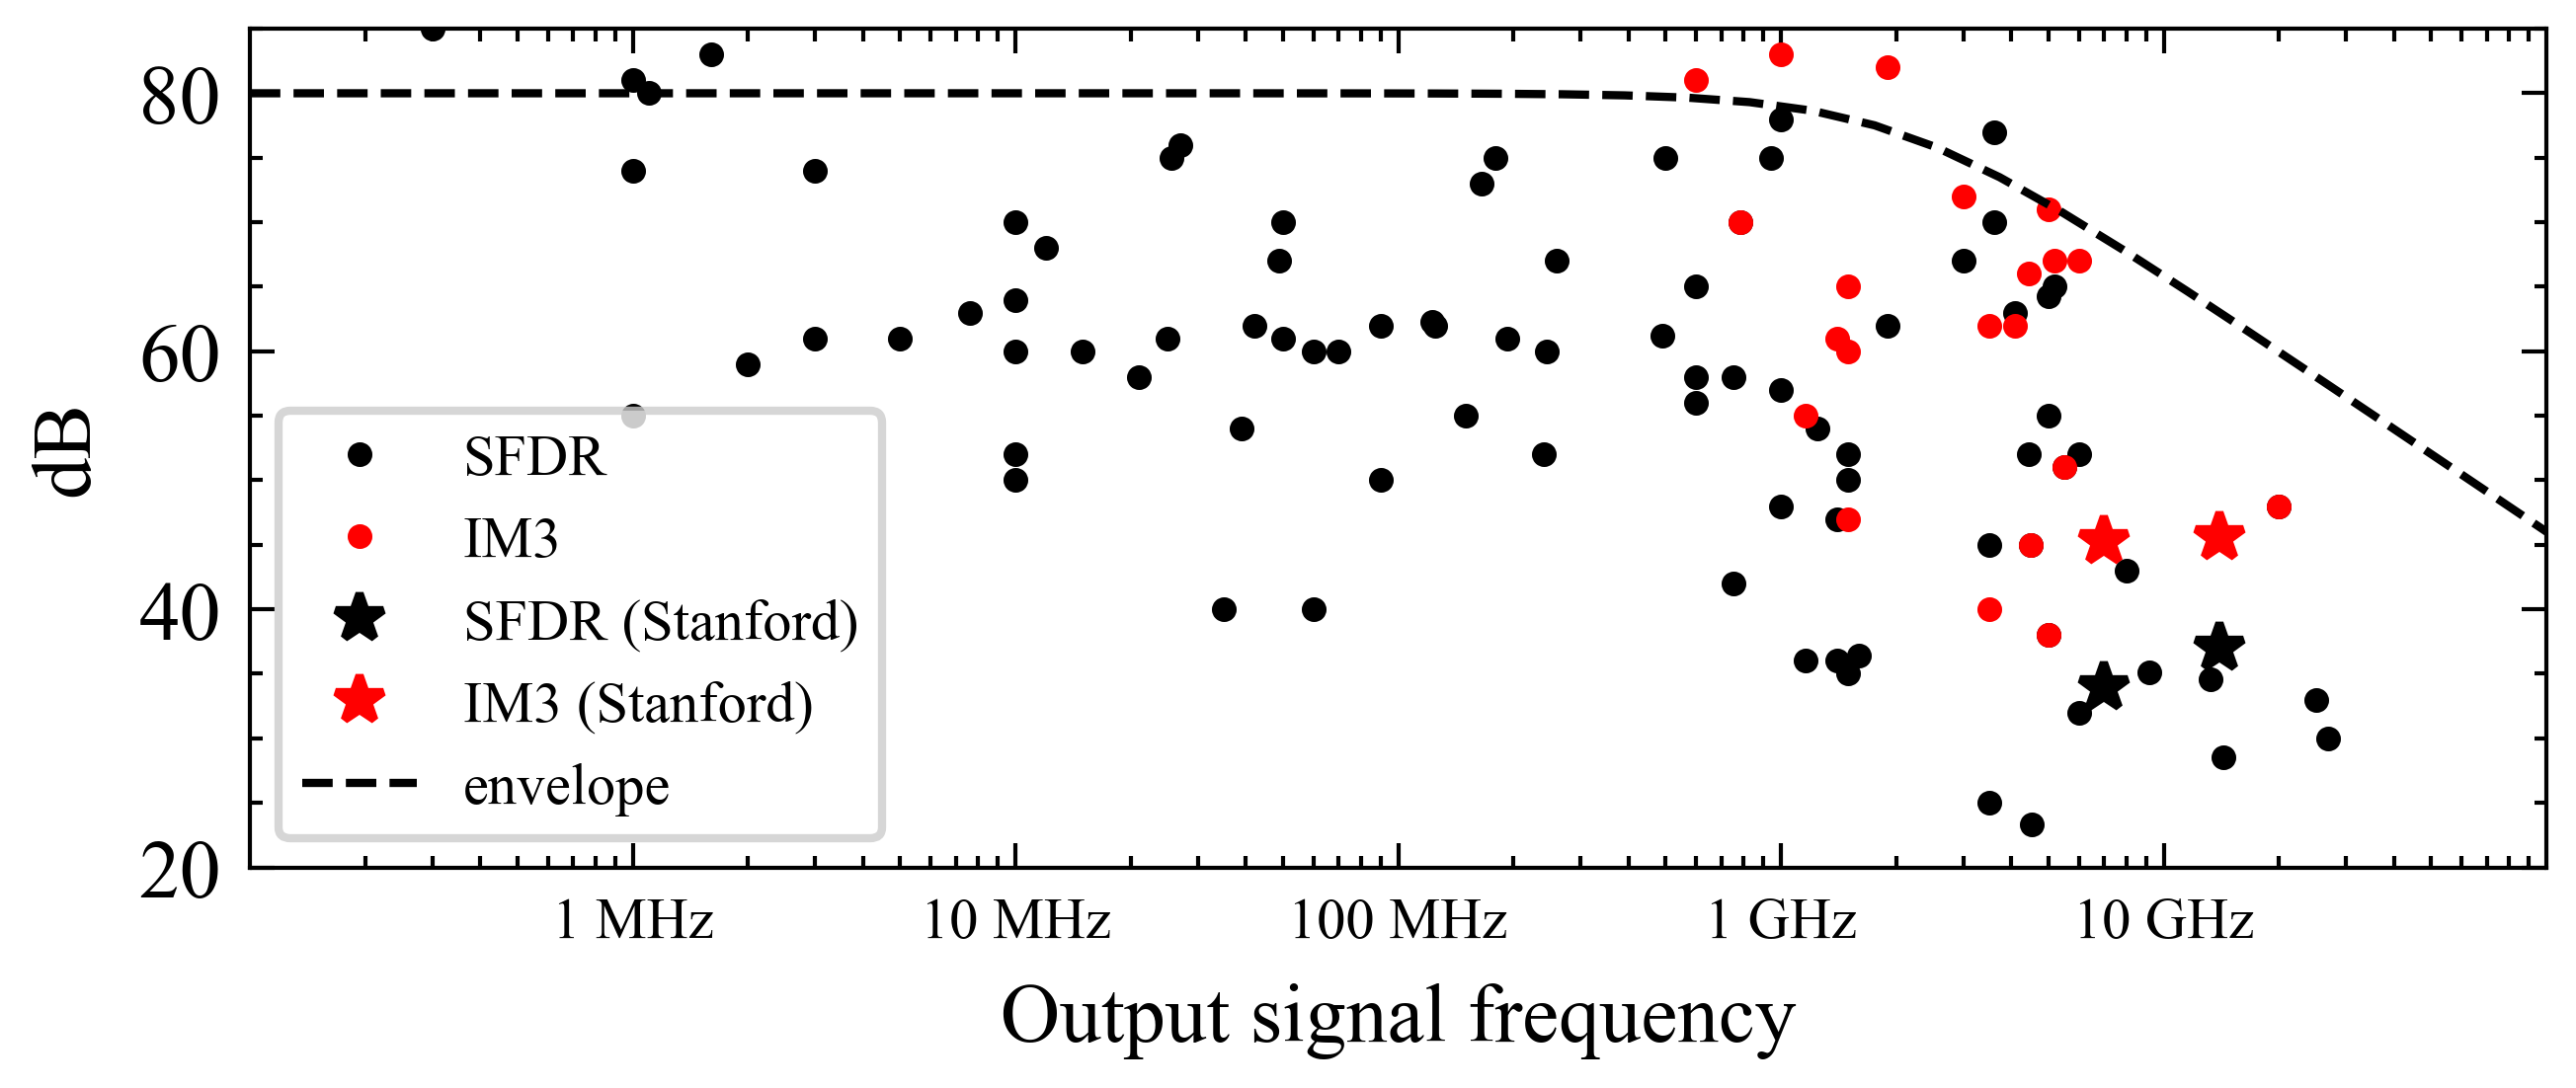

In [165]:
scaleF=1.25
fig, ax = plt.subplots(figsize=(4*scaleF,1.5*scaleF), dpi=600)
ax.plot(x*MHz/GHz                       , y                  , '.' , label='SFDR'           , ms=4)
ax.plot(x*MHz/GHz                       , y2                 , 'r.', label='IM3'            , ms=4)
ax.plot(df_stanford['Fout test']*MHz/GHz, df_stanford['SFDR'], 'k*', label='SFDR (Stanford)', ms=6)
ax.plot(df_stanford['Fout test']*MHz/GHz, df_stanford['IM3'] , 'r*', label='IM3 (Stanford)' , ms=6)
ax.plot(env_x                           , env_y              , 'k' , label='envelope'             )

# Axis settings
ax.set_xlabel('Output signal frequency')
ax.set_xscale('log')
ax.set_xlim(1e-4, 100)
ax.set_xticks([1e-3, 1e-2, 1e-1, 1, 10])
ax.set_xticklabels(['1 MHz', '10 MHz', '100 MHz', '1 GHz', '10 GHz'], fontsize=7)
ax.set_ylabel('dB')
ax.set_ylim(20, 85)
ax.legend(frameon=1, fontsize=7)

# Save fig
fig.savefig('survey-1.png')